<a href="https://colab.research.google.com/github/drewm8080/Analyzing-COVID-19-Data/blob/main/Covidestim_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Input Here**

In [1]:
print('Welcome to the COVID-19 Covidestim Statistics')
print('')
print('Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.')
print('states/territories not available: California,DC,Delaware,Indiana,Illinois,Lousiana,Michigan,Missouri,North Carolina,Nevada,Pennslyvania,Texas,Vermont,West Virgina')
userinput = input('Please put state name here:')

Welcome to the COVID-19 Covidestim Statistics

Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.
states/territories not available: California,DC,Delaware,Indiana,Illinois,Lousiana,Michigan,Missouri,North Carolina,Nevada,Pennslyvania,Texas,Vermont,West Virgina
Please put state name here:California


**Framework for Cases and Deaths from Covidestim**

In [2]:
# might need this cell if your data does not download directly from the URL
# !pip install fsspec
# !pip install pandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# ignore this 
data = { 'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY' }

In [5]:
# loading in the data
url = 'https://covidestim.s3.us-east-2.amazonaws.com/latest/state/estimates.csv'
df= pd.read_csv(url)

In [6]:
# setting datetime index 
df.date = pd.to_datetime(df.date)
df = df[df.date >= '2020-03-01']

In [7]:
# making sure the data starts after 03-01-2020
df = df[df.date >= '2020-03-01']

In [8]:
# slicing the data 
df = df.loc[:,['state','date','cases.fitted','deaths.fitted']]

In [9]:
# cleaning the data
df['Cases'] = df['cases.fitted']
df['Deaths'] = df['deaths.fitted']
df = df.drop(columns =['cases.fitted','deaths.fitted'])

In [10]:
# selecting the state
df = df[df.state == userinput]

In [11]:
# cleaning the data
df= df.reset_index(drop = True)

In [12]:
# calulating the cummulative cases
for i in range(1,len(df)):
  x = df.loc[i,'Cases'] + df.loc[i-1,'Cases']
  df.loc[i,'Cases'] = x

In [13]:
# calulating the cummulative deaths
for i in range(1,len(df)):
  x = df.loc[i,'Deaths'] + df.loc[i-1,'Deaths']
  df.loc[i,'Deaths'] = x

In [14]:
# creating day column for each date 
df['Day'] = df.groupby('state')['date'].rank(ascending=True)

In [15]:
df['Avg day of case'] = 0 # declaring new column
df['Avg day of death'] = 0

In [16]:
# setting the first day of each state to be the first date of cases 
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'Day']

In [17]:
# setting it so the avg day of death is the first day 
df = df[df.Deaths > 0]

In [18]:
# setting the first day as the first row in Avg day of death

df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'Day']

In [19]:
# creating the CDF Column
df['cdf_cases'] = df['Cases']

In [20]:
# creating the cdf column
df['cdf_deaths'] = df['Deaths']

In [21]:
# creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index()

In [22]:
# creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [23]:
# calulating Avgerage day of case
for i in range(1, len(df)):
  x = (((df.loc[i, 'Cases'] - df.loc[i-1, 'Cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'Cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)

In [24]:
# calulating Avgerage day of death
for i in range(1, len(df)):
  x = (((df.loc[i, 'Deaths'] - df.loc[i-1, 'Deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'Deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [25]:
# subtracting the avg death day and avg case day
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [26]:
# avg case day/ current day
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [27]:
# avg death day/ current day
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [28]:
# cleaning data
df = df.drop(columns = 'index')

**Framework for hospital Data**

In [29]:
# loading in the data

hospitalizationdf = pd.read_csv('https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD')

In [30]:
# slicing the df
hospitalizationdf = hospitalizationdf.loc[:,['state','date','previous_day_admission_adult_covid_confirmed','previous_day_admission_adult_covid_suspected','previous_day_admission_pediatric_covid_confirmed','previous_day_admission_pediatric_covid_suspected']]

In [31]:
# setting the state through user input
hospitalizationdf = hospitalizationdf[hospitalizationdf.state == data[userinput]]

In [32]:
# setting to datetime 
hospitalizationdf.date = pd.to_datetime(hospitalizationdf.date)

In [33]:
# sorting the data
hospitalizationdf = hospitalizationdf.sort_values(by = 'date')

In [34]:
# resetting the index
hospitalizationdf = hospitalizationdf.reset_index(drop = True)

In [35]:
# starting the date at 03-01-2020
hospitalizationdf = hospitalizationdf[hospitalizationdf['date'] >= '03-01-2020']

In [36]:
# making sure the date is greater than 0
hospitalizationdf = hospitalizationdf [(hospitalizationdf.previous_day_admission_adult_covid_confirmed >0)& (hospitalizationdf.previous_day_admission_adult_covid_suspected >0) & (hospitalizationdf.previous_day_admission_pediatric_covid_confirmed >0) & (hospitalizationdf.previous_day_admission_pediatric_covid_suspected>0)]

In [37]:
# resetting the index
hospitalizationdf = hospitalizationdf.reset_index(drop = True)

In [38]:
# making the data cumulative 
for i in range(1,len(hospitalizationdf)):
  x = hospitalizationdf.loc[i,'previous_day_admission_adult_covid_confirmed'] + hospitalizationdf.loc[i-1,'previous_day_admission_adult_covid_confirmed']
  hospitalizationdf.loc[i,'previous_day_admission_adult_covid_confirmed'] = x

In [39]:
# making the data cumulative 
for i in range(1,len(hospitalizationdf)):
  x = hospitalizationdf.loc[i,'previous_day_admission_adult_covid_suspected'] + hospitalizationdf.loc[i-1,'previous_day_admission_adult_covid_suspected']
  hospitalizationdf.loc[i,'previous_day_admission_adult_covid_suspected'] = x

In [40]:
# making the data cumulative 
for i in range(1,len(hospitalizationdf)):
  x = hospitalizationdf.loc[i,'previous_day_admission_pediatric_covid_confirmed'] + hospitalizationdf.loc[i-1,'previous_day_admission_pediatric_covid_confirmed']
  hospitalizationdf.loc[i,'previous_day_admission_pediatric_covid_confirmed'] = x

In [41]:
# making the data cumulative 
for i in range(1,len(hospitalizationdf)):
  x = hospitalizationdf.loc[i,'previous_day_admission_pediatric_covid_suspected'] + hospitalizationdf.loc[i-1,'previous_day_admission_pediatric_covid_suspected']
  hospitalizationdf.loc[i,'previous_day_admission_pediatric_covid_suspected'] = x

In [42]:
# adding up all the data 
hospitalizationdf['hospitalized_cumulative'] = hospitalizationdf.previous_day_admission_adult_covid_confirmed + hospitalizationdf.previous_day_admission_adult_covid_suspected + hospitalizationdf.previous_day_admission_pediatric_covid_confirmed + hospitalizationdf.previous_day_admission_pediatric_covid_suspected

In [43]:
# cleaning the data 
hospitalizationdf = hospitalizationdf.drop(columns = ['previous_day_admission_adult_covid_confirmed','previous_day_admission_adult_covid_suspected','previous_day_admission_pediatric_covid_confirmed','previous_day_admission_pediatric_covid_suspected'])

In [44]:
# merging the two dataframes together
df = df.merge(hospitalizationdf, on ='date')

In [45]:
# cleaning data
df = df.drop(columns='state_y')

In [46]:
# cleaning data 
df['state'] = df['state_x']

In [47]:
# cleaning data
df = df.drop(columns = 'state_x')

In [48]:
# creating the cdf column
df['cdf_hospitalized'] = df['hospitalized_cumulative']

In [49]:
# creating the formula for the CDF column
df.loc[:,'cdf_hospitalized':] = df.loc[:,'cdf_hospitalized':].div(df.iloc[-1]['cdf_hospitalized':])
df = df.reset_index(drop= True)

In [50]:
# creating avg day of hospitalization
df['Avg day of hospitalization'] = 0

In [51]:
# setting the first day of avg hospitalizations to the first day
df.loc[0,'Avg day of hospitalization'] = df.loc[0,'Day']

In [52]:
# calulating Avgerage day of Hospitalization
for i in range(1, len(df)):
  x = (((df.loc[i, 'hospitalized_cumulative'] - df.loc[i-1, 'hospitalized_cumulative']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of hospitalization'])) / (df.loc[i, 'hospitalized_cumulative'])) + (df.loc[i-1, 'Avg day of hospitalization'])
  df.loc[i, 'Avg day of hospitalization'] = round(x, 2)

In [53]:
# avg hospitalization day vs case day
df['Avg Hospitalization Day - Avg Case Day'] = df['Avg day of hospitalization'] - df['Avg day of case']  

In [54]:
# avg hospitalization/ current day
df['Avg Day of Hospitalization/ Current Day'] = df['Avg day of hospitalization'] /df['Day']

In [55]:
# cleaning dataframe
df = df.loc[:,['date','state','Deaths','Cases','hospitalized_cumulative','Day','Avg day of case','Avg day of death','Avg day of hospitalization','Avg Death Day - Avg Case Day','Avg Hospitalization Day - Avg Case Day','Avg Day of Case/ Current Day','Avg Day of Death/ Current Day','Avg Day of Hospitalization/ Current Day','cdf_cases','cdf_deaths','cdf_hospitalized']]

In [56]:
df

,date,state,Deaths,Cases,hospitalized_cumulative,Day,Avg day of case,Avg day of death,Avg day of hospitalization,Avg Death Day - Avg Case Day,Avg Hospitalization Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day,Avg Day of Hospitalization/ Current Day,cdf_cases,cdf_deaths,cdf_hospitalized
0,2020-07-15,California,7283.083124,3.617768e+05,983.0,137.0,102.15,85.90,137.00,-16.25,34.85,0.745620,0.627007,1.000000,0.0997455,0.12639,0.00268609
1,2020-07-16,California,7382.479706,3.708637e+05,2030.0,138.0,103.03,86.60,137.52,-16.43,34.49,0.746594,0.627536,0.996522,0.102251,0.128115,0.00554707
2,2020-07-17,California,7484.152887,3.799897e+05,3145.0,139.0,103.89,87.31,138.04,-16.58,34.15,0.747410,0.628129,0.993094,0.104767,0.129879,0.00859386
3,2020-07-18,California,7588.095024,3.891232e+05,4192.0,140.0,104.74,88.03,138.53,-16.71,33.79,0.748143,0.628786,0.989500,0.107285,0.131683,0.0114548
4,2020-07-19,California,7694.157940,3.982472e+05,4972.0,141.0,105.57,88.76,138.92,-16.81,33.35,0.748723,0.629504,0.985248,0.109801,0.133523,0.0135862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2021-03-16,California,56752.412021,3.614907e+06,362557.0,381.0,265.82,271.13,270.17,5.31,4.35,0.697690,0.711627,0.709108,0.996666,0.984874,0.990704
244,2021-03-17,California,56947.479060,3.617604e+06,363459.0,382.0,265.91,271.51,270.45,5.60,4.54,0.696099,0.710759,0.707984,0.99741,0.988259,0.993169
245,2021-03-18,California,57132.137797,3.620172e+06,364269.0,383.0,265.99,271.87,270.70,5.88,4.71,0.694491,0.709843,0.706789,0.998118,0.991464,0.995382
246,2021-03-19,California,57306.330505,3.622590e+06,365114.0,384.0,266.07,272.21,270.96,6.14,4.89,0.692891,0.708880,0.705625,0.998784,0.994487,0.997691


**Statistics**

In [57]:
# framework for statistics
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
differCases= -df['Avg Death Day - Avg Case Day'].min()
differhospitalizations = df['Avg Hospitalization Day - Avg Case Day'].max()
differhospitalizations1 = -df['Avg Hospitalization Day - Avg Case Day'].min()

In [58]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Death Day – Case Day =', differDeaths)
print('Case Day - Death Day =',differCases)
print('Case Day - Hospitalization day = ',differhospitalizations)
print('Hospialization Day - Case Day =', differhospitalizations1) 

COVID-19 STATISTICS

State =  California
Average Day of Death and Average Day of Case as of 2021-03-20 00:00:00
Case = 266.14
Death =  272.53
Days When Average Dates of Death Differ By Largest Amounts
Death Day – Case Day = 6.389999999999986
Case Day - Death Day = 41.120000000000005
Case Day - Hospitalization day =  34.849999999999994
Hospialization Day - Case Day = 2.1599999999999966


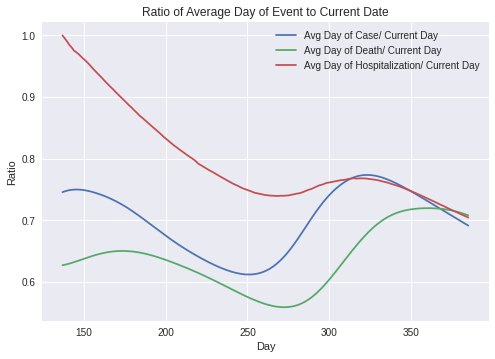

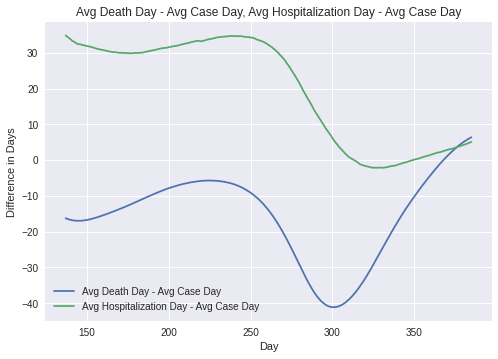

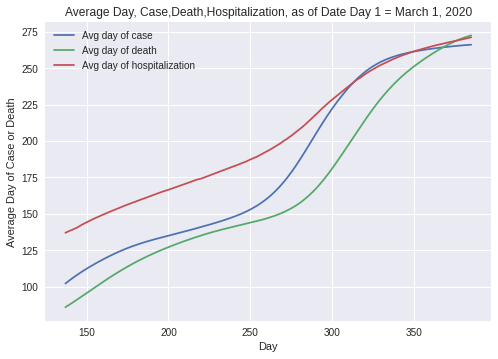

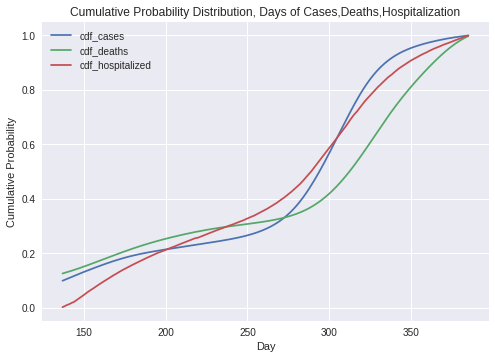

In [61]:
# ratio avg Day of Event/current Date Graph
df.plot(x= 'Day',y = ['Avg Day of Case/ Current Day','Avg Day of Death/ Current Day','Avg Day of Hospitalization/ Current Day'],title = 'Ratio of Average Day of Event to Current Date', ylabel = 'Ratio')
# avg hospitalization day - avg case day
df.plot(x = 'Day', y=['Avg Death Day - Avg Case Day','Avg Hospitalization Day - Avg Case Day'],title = 'Avg Death Day - Avg Case Day, Avg Hospitalization Day - Avg Case Day',ylabel = 'Difference in Days')
# avg Day of Case/Death/Hospitalization
df.plot(x = 'Day', y= ['Avg day of case','Avg day of death','Avg day of hospitalization'],title = 'Average Day, Case,Death,Hospitalization, as of Date Day 1 = March 1, 2020', ylabel = 'Average Day of Case or Death')
# CDF
df.plot( x= 'Day', y= ['cdf_cases','cdf_deaths','cdf_hospitalized'],title = 'Cumulative Probability Distribution, Days of Cases,Deaths,Hospitalization', ylabel = 'Cumulative Probability')

plt.style.use('seaborn')